## PyAV

In [1]:
import av

In [3]:
container = av.open('jwasp0.avi')
container

<av.InputContainer 'jwasp0.avi'>

In [6]:
container.streams.video[0]

<av.VideoStream #0 mpeg4, yuv420p 1440x1080 at 0x7ff5fd3effa0>

In [10]:
container.streams.video[0].frames

6325

In [14]:
container.seek(0 * 1_000_000)
frames = container.decode(video=0)
frames

In [15]:
frame = next(frames)
frame

<av.VideoFrame #0, pts=0 yuv420p 1440x1080 at 0x7ff5fcc2fac0>

In [24]:
print(list(sorted(av.video.format.names)))

['0bgr', '0rgb', 'abgr', 'argb', 'ayuv64be', 'ayuv64le', 'bayer_bggr16be', 'bayer_bggr16le', 'bayer_bggr8', 'bayer_gbrg16be', 'bayer_gbrg16le', 'bayer_gbrg8', 'bayer_grbg16be', 'bayer_grbg16le', 'bayer_grbg8', 'bayer_rggb16be', 'bayer_rggb16le', 'bayer_rggb8', 'bgr0', 'bgr24', 'bgr4', 'bgr444be', 'bgr444le', 'bgr48be', 'bgr48le', 'bgr4_byte', 'bgr555be', 'bgr555le', 'bgr565be', 'bgr565le', 'bgr8', 'bgra', 'bgra64be', 'bgra64le', 'cuda', 'd3d11', 'd3d11va_vld', 'drm_prime', 'dxva2_vld', 'gbrap', 'gbrap10be', 'gbrap10le', 'gbrap12be', 'gbrap12le', 'gbrap16be', 'gbrap16le', 'gbrapf32be', 'gbrapf32le', 'gbrp', 'gbrp10be', 'gbrp10le', 'gbrp12be', 'gbrp12le', 'gbrp14be', 'gbrp14le', 'gbrp16be', 'gbrp16le', 'gbrp9be', 'gbrp9le', 'gbrpf32be', 'gbrpf32le', 'gray', 'gray10be', 'gray10le', 'gray12be', 'gray12le', 'gray14be', 'gray14le', 'gray16be', 'gray16le', 'gray9be', 'gray9le', 'grayf32be', 'grayf32le', 'mediacodec', 'mmal', 'monob', 'monow', 'nv12', 'nv16', 'nv20be', 'nv20le', 'nv21', 'nv24'

In [39]:
array = frame.to_ndarray(format='yuv420p')
array

array([[ 70,  70,  70, ...,  12,  12,  12],
       [ 70,  70,  70, ...,  12,  12,  12],
       [ 70,  70,  70, ...,  12,  12,  12],
       ...,
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127]], dtype=uint8)

In [40]:
import matplotlib.pyplot as plt

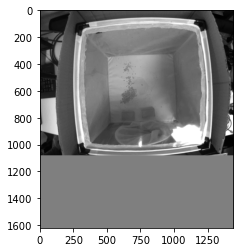

In [41]:
plt.imshow(array, cmap='gray');

In [42]:
array = frame.to_ndarray(format='gray')
array

array([[63, 63, 63, ...,  0,  0,  0],
       [63, 63, 63, ...,  0,  0,  0],
       [63, 63, 63, ...,  0,  0,  0],
       ...,
       [ 0,  0,  2, ..., 14, 14, 14],
       [ 0,  0,  5, ..., 14, 14, 14],
       [ 0,  0,  5, ..., 14, 14, 14]], dtype=uint8)

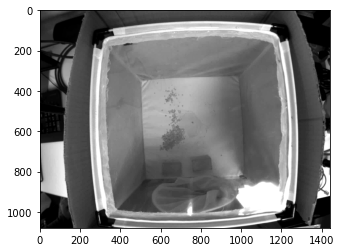

In [43]:
plt.imshow(array, cmap='gray');

## PIMS

In [55]:
import pims
import numpy as np

In [46]:
vid = pims.PyAVReaderIndexed('jwasp0.avi')
vid

<Frames>
Source: jwasp0.avi
Length: 6325 frames
Frame Shape: (1080, 1440, 3)

Frame([[[60, 62, 59],
        [60, 62, 59],
        [60, 62, 59],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[60, 62, 59],
        [60, 62, 59],
        [60, 62, 59],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[60, 62, 59],
        [60, 62, 59],
        [60, 62, 59],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  2,  0],
        ...,
        [11, 13, 10],
        [11, 13, 10],
        [11, 13, 10]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 2,  4,  1],
        ...,
        [11, 13, 10],
        [11, 13, 10],
        [11, 13, 10]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 2,  4,  1],
        ...,
        [11, 13, 10],
        [11, 13, 10],
        [11, 13, 10]]], dtype=uint8)
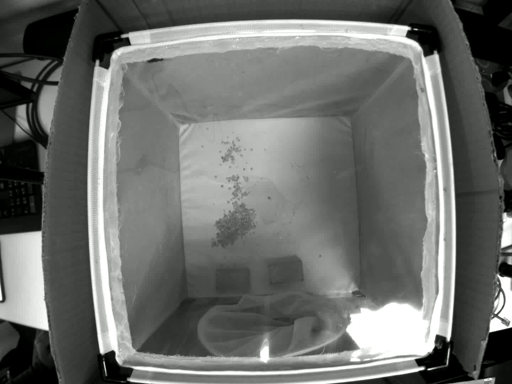

In [47]:
vid[0]

In [57]:
np.array(vid[0]).shape

(1080, 1440, 3)

In [58]:
vid[:10]

Sliced PyAVReaderIndexed. Original repr:
    <Frames>
    Source: jwasp0.avi
    Length: 6325 frames
    Frame Shape: (1080, 1440, 3)
    

In [59]:
np.array(vid[:10]).shape

(10, 1080, 1440, 3)